In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
df = pd.read_csv("data_YesBank_StockPrices.csv")
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [3]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [5]:
df['Month'], df['Year'] = df['Date'].dt.month, df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


[Text(0.5, 1.0, 'Close Price Timeline')]

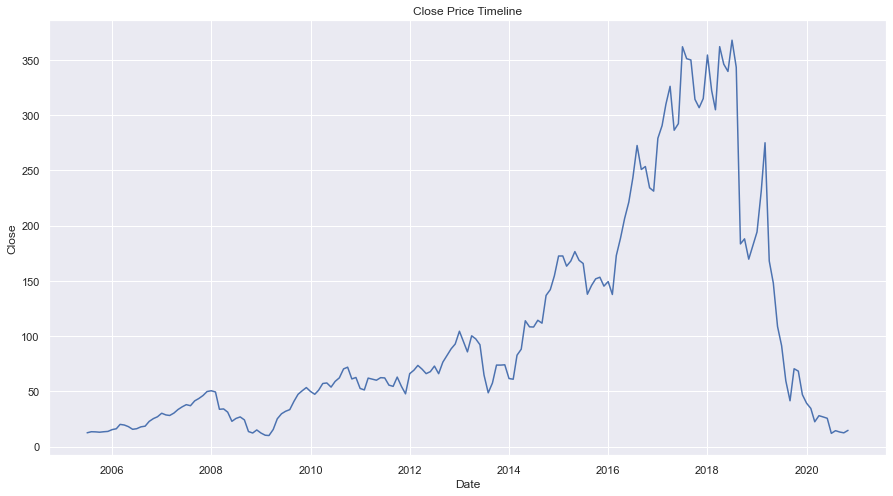

In [6]:
sns.lineplot(x=df['Date'], y=df['Close']).set(title='Close Price Timeline')

In [7]:
df_model = df[['Month', 'Open', 'High', 'Low', 'Close']].copy()
df_model

,Month,Open,High,Low,Close
0,7,13.00,14.00,11.25,12.46
1,8,12.58,14.88,12.55,13.42
2,9,13.48,14.87,12.27,13.30
3,10,13.20,14.47,12.40,12.99
4,11,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,7,25.60,28.30,11.10,11.95
181,8,12.00,17.16,11.85,14.37
182,9,14.30,15.34,12.75,13.15
183,10,13.30,14.01,12.11,12.42


In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler=MinMaxScaler(feature_range=(0,1))
df_model_=pd.DataFrame(scaler.fit_transform(df_model), columns=df_model.columns, index=df.index)
df_model_.head()

,Month,Open,High,Low,Close
0,0.545455,0.008334,0.007027,0.016767,0.006929
1,0.636364,0.007168,0.009268,0.020591,0.009611
2,0.727273,0.009668,0.009242,0.019768,0.009276
3,0.818182,0.008890,0.008224,0.020150,0.008410
4,0.909091,0.009307,0.006722,0.021562,0.009583


In [9]:
X = df_model_.drop(columns=['Close'])
y = df_model_['Close']

In [10]:
X.head()

,Month,Open,High,Low
0,0.545455,0.008334,0.007027,0.016767
1,0.636364,0.007168,0.009268,0.020591
2,0.727273,0.009668,0.009242,0.019768
3,0.818182,0.008890,0.008224,0.020150
4,0.909091,0.009307,0.006722,0.021562


In [11]:
y.head()

0    0.006929
1    0.009611
2    0.009276
3    0.008410
4    0.009583
Name: Close, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [13]:
df.shape

(185, 7)

In [14]:
X_train.shape, X_test.shape

((148, 4), (37, 4))

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [16]:
linear.score(X_train, y_train) #train R2

0.9959017394878782

In [17]:
linear.score(X_test, y_test) #test R2

0.9900260796136832

In [18]:
from sklearn.metrics import mean_squared_error
y_pred_train = linear.predict(X_train)
mean_squared_error(y_train, y_pred_train, squared=True) #train rmse

0.00032085817200625205

In [19]:
y_pred_test = linear.predict(X_test)
mean_squared_error(y_test, y_pred_test, squared=True) #test rmse

0.0006164220883321216

In [40]:
def predict_from_dataframe(data, scaler, model):
    scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
    X_scaled = scaled_data.drop(columns='Close')
    predicted_val = model.predict(X_scaled)
    X_scaled['Close'] = predicted_val
    return scaler.inverse_transform(X_scaled)[:, -1]

a = predict_from_dataframe(df_model.iloc[:2, :], scaler, linear)
a

array([13.1695808 , 15.05330126])

In [42]:
df_model.iloc[:2, :]

,Month,Open,High,Low,Close
0,7,13.00,14.00,11.25,12.46
1,8,12.58,14.88,12.55,13.42


- Random Forest https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Decision Trees https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- SVM-R https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html